## Final Project Submission


* Nick Oseland 
* full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco 
* Blog post URL:


### Eyeballing
* Does the code look clean?
    * looks clean
    * remove ; from lines of code
* Do markdown cells look organized and do they have a structure?
    * these look good so far
* Are visualizations labeled and clear?
    * great visualizations



### Organization of Project
* Is introduction informative?
* Are questions labeled?
    * state your question
    * Investigation Section
        * Visualizations
        * Stats
    * Findings/Conclusion
* Is there a workflow?
* Are there recommendations at the end?

### Introduction
In this notebook, we will be taking an in-deth look at a dataset of homes sold between May 2014 and May 2015 in King's County in Washington (State). The objective is to predict home prices in the data. 

mention OSEMN framework

* [Obtaining Data](#Obtain)
* [Scrubbing/Cleaning Data](#Scrubbing)
    * Handling Null Values
* [EDA - Exploratory Data Analysis](#EDA)
    * Questions should go here
    * Visualizations should go here
* [Modeling]()
* [Investigate Models]()

In the future, I will import only the necessary libraries. While I'm still so new to this, I wanted to import everything I've seen thus far, so as not to limit myself. 

In [31]:
# Importing all librairies that I may need to use.
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats as sts
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFE

%matplotlib inline
cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lmplot

## Obtain

In [32]:
#Taking a look at first 5 rows from data set
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


[Back to Introduction](#Introduction)

# Scrubbing
At this stage, I'm trying to get a feel for the data set.

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [33]:
#rows and columns from data set (DF)
df.shape

(21597, 21)

In [34]:
#randomly displays 20 rows within dataset, ran this several times to get a better look.
df.sample(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19155,6865200981,12/21/2014,517000.0,2,1.00,1140,3750,1.0,0.0,0.0,...,7,1140,0.0,1925,0.0,98103,47.6619,-122.343,1660,4000
5020,3362401611,3/25/2015,1170000.0,4,3.75,3920,4500,3.0,0.0,0.0,...,8,3920,0.0,2013,0.0,98103,47.6805,-122.346,2040,3000
8965,9828702667,5/19/2014,482500.0,3,2.25,1450,1445,2.0,0.0,0.0,...,7,980,470.0,2005,0.0,98122,47.6184,-122.301,1510,1370
11869,705700240,2/18/2015,380000.0,4,2.50,2320,10079,2.0,0.0,0.0,...,7,2320,0.0,1994,0.0,98038,47.3828,-122.026,2010,7438
20926,3278606110,1/8/2015,375000.0,3,2.50,1580,2407,2.0,0.0,0.0,...,8,1580,0.0,2013,0.0,98126,47.5455,-122.368,1580,2212
15964,1329300480,10/23/2014,376950.0,4,2.50,2643,5750,2.0,0.0,0.0,...,8,2643,0.0,2012,0.0,98030,47.3519,-122.173,2406,5772
16076,3541700170,10/17/2014,324450.0,3,2.00,1420,16000,1.0,0.0,0.0,...,7,1420,0.0,1966,0.0,98166,47.4780,-122.358,1900,12630
20819,291310310,12/10/2014,533500.0,3,3.50,2490,3517,2.0,0.0,0.0,...,8,1720,770.0,2005,0.0,98027,47.5341,-122.067,1600,2378
16581,806800420,10/23/2014,289950.0,3,2.50,2070,6145,2.0,0.0,0.0,...,7,2070,0.0,2003,0.0,98092,47.3357,-122.172,2070,5297
16240,9265410010,2/3/2015,212000.0,3,1.75,1470,8350,1.0,0.0,0.0,...,7,1470,0.0,1990,0.0,98001,47.2587,-122.253,1590,8182


In [35]:
#.describe()basic statistical details like percentile, mean, std etc. of the data
np.round(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


## Handling Null Values
At this point, I'm focused on which columns have null values, incorrect data type, or too many zeros.

In [36]:
df.isnull().sum()  # check for missing (NaN) values, I prefer .sum() over .any() in this instance as it shows me how many for each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

So we have some missing values.
waterfront = 2376, 
view = 63, 
yr_renovated = 3,842.

In [37]:
#.info() function is used to get a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [38]:
#feel pretty safe in dropping ID at this point
df = df.drop(['id'], axis=1)

In [39]:
#view looks to be the correct data type, so we will just deal with missing values.
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [40]:
#replace NaN with 0
df['view'].fillna(0,inplace=True)

yr_renovated is one that really threw me for a moment. While I am fairly confident that renovations will have a direct impact on housing prices. I thought it was also too ambigous to really try to account for. Though part of my reasoning had to do with the fact that it was missing values and I didnt want to deal with it (as well as several others we won't get into). suffise it to say, this truly is an iterative process. I will try to keep my thought process easy to follow from beginning to end and not lead anyone into the quagmire that was the actual process. Just know that my approach and process was constantly shifting as I better understood the data I was working with, or just discovering better ways of cleaning data while I was trying to find answers. 

In the end, I decided that it made the most sense to me as a simple yes or no.... ie, True or False (bool).

In [41]:
# replacing NaN values with a 0
df['yr_renovated'].fillna(0, inplace=True)

#make sure it worked
df['yr_renovated'].isnull().sum()

0

Awsome, moving on.

## Data Conditioning

In [42]:
#change to boolean data type
df['yr_renovated'] = df['yr_renovated'].astype(bool)

#we should probably rename it to better represent this change
df['was_renovated'] = df['yr_renovated']

In [43]:
#waterfront also makes more sense as a boolean, so...
df['waterfront'] = df['waterfront'].astype('bool')

While looking for something else entirely, I discovered why I had been having issues with "sqft_basement". While trying to convert its data type, I kept getting an error message I could not decifer. I'll spare you the bulk of it, but it ended with '?' which I could not figure out. I even pestered my instructor about it (to no avail), who told me I needed to figure it out...so I knew I was missing something. Thats when I saw '?' was an actual input found in 'sqft_basement' column. I also got the impression that having sqft_basement, sqft_above, sqft_living could get a bit "muddy". After some trial and error, I came upon someone who had a similar problem, and came up with an elegant solution I will try to re-create with this data set. 

In [44]:
df['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [45]:
#locate rows containing ? DataFrame. loc. Access a group of rows and columns by label(s) or a boolean array. .loc[] is primarily label based, but may also be used with a boolean array.
df.loc[df['sqft_basement'] == '?',['sqft_living','sqft_above']]

#locate rows with a different value for sqft_above and sqft_living
df.loc[(df["sqft_basement"] == '?') & (df["sqft_above"]!=df['sqft_living'])]

#Replace ? with difference between sqft_above and sqft_living. The abs() method returns the absolute value of the given number.
df['sqft_basement'].replace(to_replace='?', value = abs(df['sqft_above']-df['sqft_living']), inplace=True)

#double check that everything was replaced correctly
df['sqft_basement'].describe()

count     21597
unique      397
top         0.0
freq      12826
Name: sqft_basement, dtype: object

If I am reading this correctly, then it means there 12,826 houses with out basements. We should probably just convert this to a boolean, it does or doesn't have a basement. It also looks like sqft_living includes the sq. footage of the basement. this makes the data misleading, or corrupted. 

In [46]:
#pandas.to_numeric Convert argument to a numeric type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

#convert column into boolean
df['sqft_basement'] = df['sqft_basement'].astype(bool)

#create column name to more accurately represent data
df['has_basement'] = df['sqft_basement']

#drop values for sqft_basement, sqft_living, and yr_renovated
df = df.drop(["sqft_basement", "sqft_living","yr_renovated"], axis=1)

In [47]:
#making sure the columns were dropped.
df.shape

(21597, 19)

I feel it is worth mentioning that at this point I stopped the kernal and cleared the outputs. I had changed my mind, shifted most of the cells up and down, and generally completely lost track of how the kernals were executing (and started kicking errors on cells I thought I had already moved past). I worked back through the cells in order, and mercifully, everything worked (so far).

### Converting 'date' to a datetime feature
#this also took a few trials

In [48]:
#Date converted into datetime
df['date'] = pd.to_datetime(df['date'])

#double check everything looks right
df['date'].head()

# query the data type for date column
#type(df['date'][0])

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

[Back to Introduction](#Introduction)

# EDA

### At this stage, I have worked through, and cleaned the data fairly well (and changed my mind about what attributes to focus on several times over).
It is time to start asking our data some questions. Not only we are tasked with asking, and hopefully answering 3 questions, but they need to be relevent questions. The example that was given to us as a bad question was: "does sq ft(living space) affect price?" This is not a bad question because it cant be answered clearly (or super easily), but because it doesn't really teach us anything either. We already know sq ft affects housing prices. This was particularly challenging for me, considering I only started "coding" less than a month ago. At this point I stopped and really started 
"pouring" though the data again, as well as searching the Web for similar research that had been done, and trying to choose the best questions to ask.  

### Q1: Is there a correlation between sales and day of the week?

Data Handling

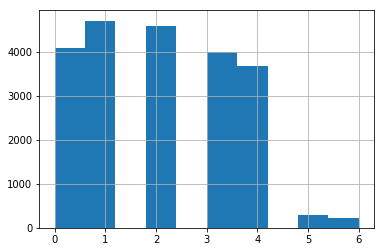

In [52]:
df['weekday'] = df['date'].dt.dayofweek

df.weekday.hist()
plt.show()

Visualization

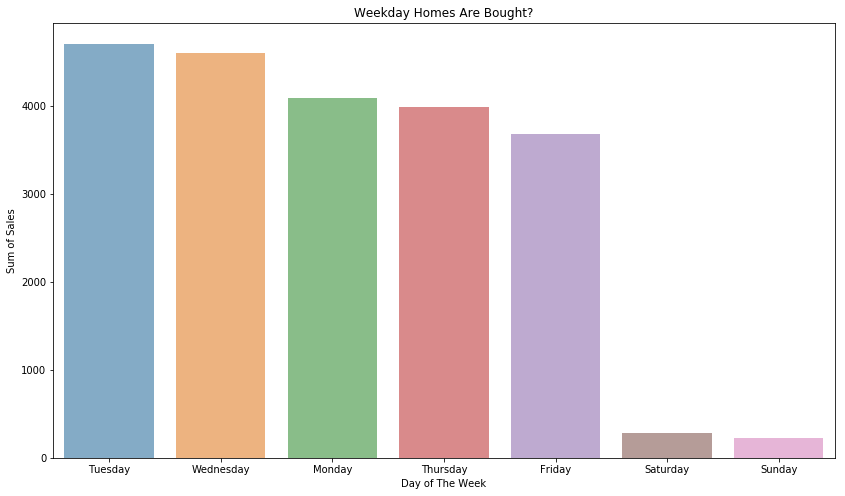

In [53]:
# rewrite the column using strings I can easily read
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day'] = df['date'].dt.dayofweek.map(dayOfWeek)

day_counts = df['day'].value_counts()

plt.figure(figsize=(14,8))
sns.barplot(day_counts.index, day_counts.values, alpha=0.6,)
plt.title('Weekday Homes Are Bought?')
plt.ylabel('Sum of Sales', fontsize=10)
plt.xlabel('Day of The Week', fontsize=10)
plt.show()

### Conclusion 

Tuesday seems to be the day of the week when most homes are bought. It appears to build up slightly from monday, to tuesday, then taper slowly down until the weekend where it drops off drastically(no surprise, banks are closed through the weekend). 

**Recommendation**

If you work in real-estate, you now know Tuesday is a day you cant afford to miss. If you are a potential home buyer, maybe you will avoid trying to schedule a bunch of "walkthroughs" on tuesday, as you are less likely to get a realators undivided attention.

### Q2: What affect does number of bedrooms have on homes?
I can think of a number of reasons this would be a good question. Having spent some time as a general contractor, I would be curious to know what type of house (bedroom wise) is selling most right now. there is no point developing a whole new subdivision of homes that you wont be able to sell off quickly.  

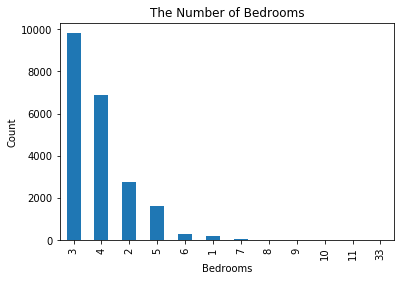

In [54]:
df['bedrooms'].value_counts().plot(kind='bar',)
plt.title('The Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine 
# Seaborn.despine() negates the effect of moving the y-axis to the right hand side
# of the figure, not seeing difference, butr leftin anyways.
plt.show()

### Conclusion
It appears that homes with 2 - 5 bedrooms take up the majority of homes in this area, and that 3 - 4 bedrooms are the most common, and likely popular/sought after homes right now.

**Recommendation**

so if I was still a contractor, or even better, a developer; I would want to squeeze as many 3-4 bedroom houses on my new lot as possibe. *putting too many houses in a single development without spacing them out will actually lower value, but we are not getting into that right now.* I think it is also safe to say that if you are in the market for a house with more than 6 or even 5 bedrooms, your options will be somewhat limited if you confine your search to this specific area.

One of the first things that stood out to me about this data set was the fact that they had the latitude and longitude for each home. So I obviously wanted to see if I could plot these values, and hopefully gain some insight in the process.

### Q3: Can we draw any conclusions from the spread of homes geographically in this area ?

<Figure size 576x576 with 0 Axes>

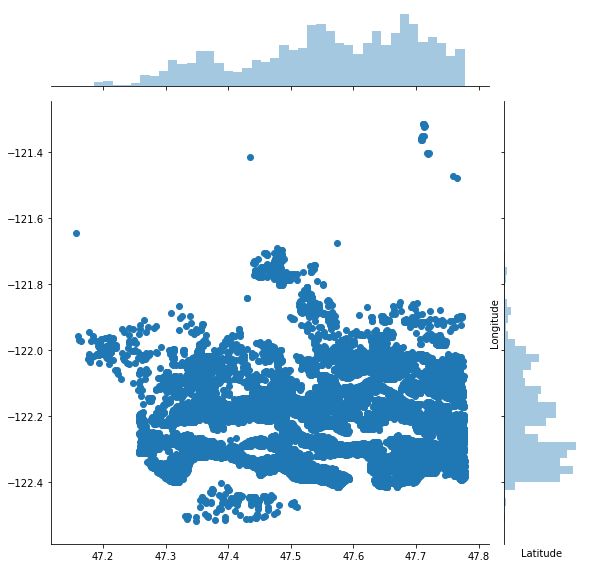

In [55]:
plt.figure(figsize=(8,8))
sns.jointplot(x=df.lat.values, y=df.long.values, height=8)
plt.ylabel('Longitude', fontsize=10)
plt.xlabel('Latitude', fontsize=10)
sns.despine
plt.show()

### Conclusion
Yes, I beleive we can. I can see fairly quickly that certain areas have particularly dense spread of homes. Areas like -122.2 - -122.4 (longitude) appear to be particularly popular to build homes, especially if you also take into account where those ranges intersect with more densely populated latitudes (like 47.7).
 **Recommendation**
 
The first thing that comes to mind is if someone where purchasing property. This could be to develope more homes, or simply purchase the land and sit for a few years as the area continues to grow in popularity, and value. If you were clever, you may even focus on the areas between where homes are densly clusterd, evaluate the area in person (due dilligence), and decide if these areas will likely also build up as the established "popular" location inevitably fill in, get overcrouded, and people start looking to spread out to the surrounding areas.  

In [56]:
#I had to drop these(bool values) to get my scatter matrix(below) to work again. 
df = df.drop(['waterfront'], axis=1)
df = df.drop(['was_renovated'], axis=1)
df = df.drop(['has_basement'], axis=1)

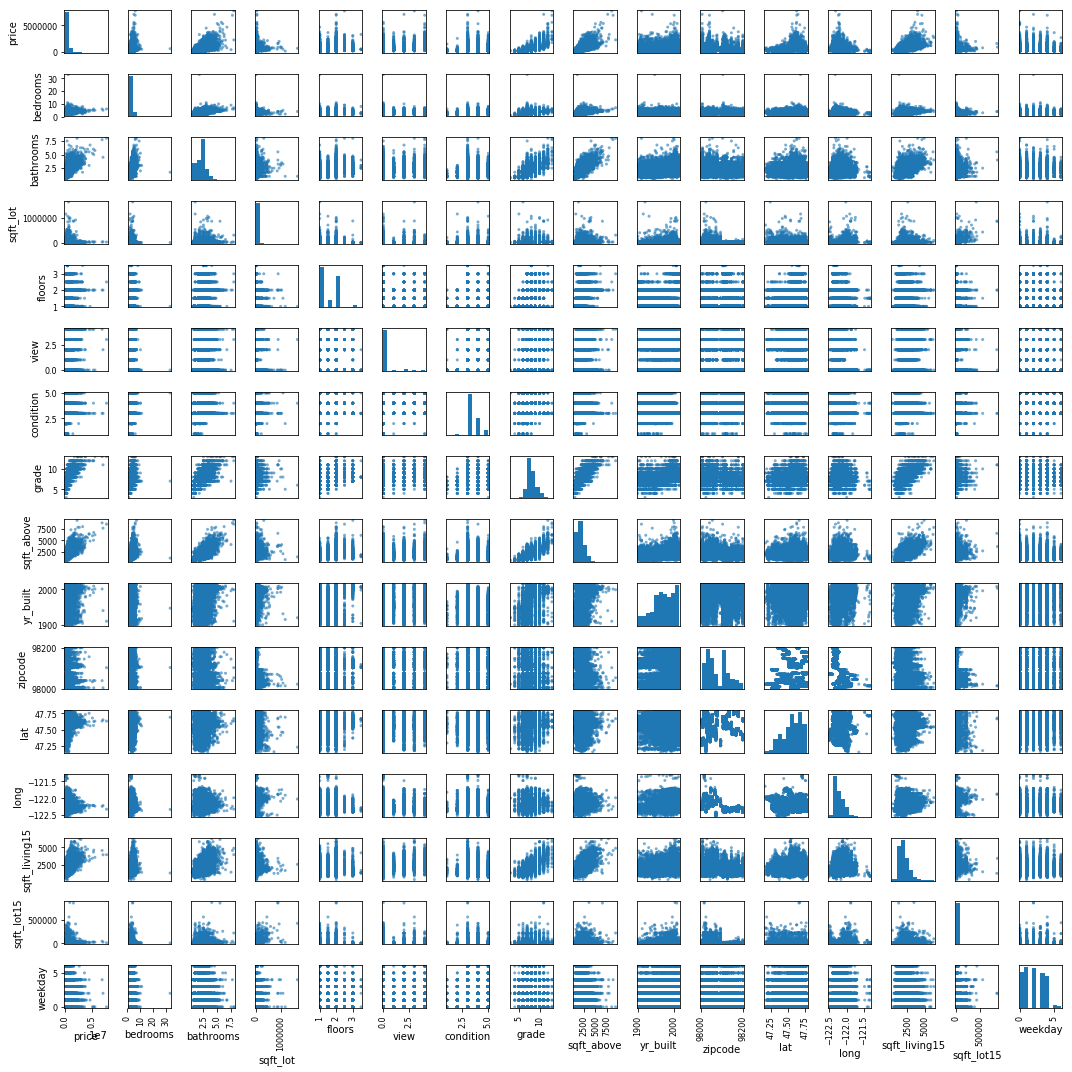

In [57]:
pd.plotting.scatter_matrix(df, alpha=0.6, figsize=(15, 15))
plt.tight_layout()
plt.show()

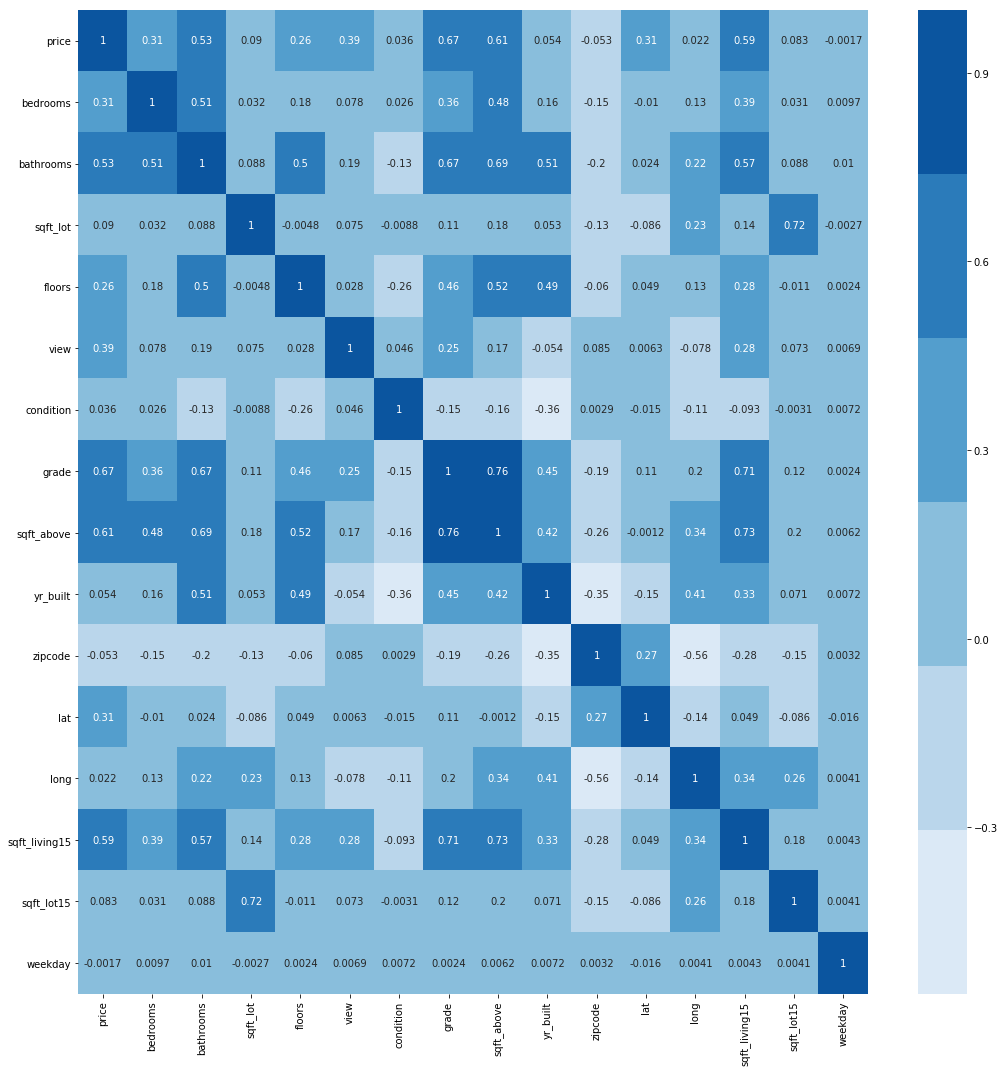

In [58]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='0.2g', cmap=sns.color_palette('Blues'))
plt.tight_layout()
plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
weekday          21597 non-null int64
day              21597 non-null object
dtypes: datetime64[ns](1), float64(6), int64(10), object(1)
memory usage: 3.0+ MB


### ------------------------------------------------------------------------------------------------------------------

We have a lot of data to work with here. Before we get too deep into cleaning and formatting our data, we can already draw some conclusions that may make things a little easier on ourselves. It is probably safe to drop ID since it is a numeric value that doesnt really give us any information other than perhaps an idea of how many houses are in data set, but there are easy ways to find that out. I'm not really sure what view is doing, and there are missing values as well, so we can drop that for now.while waterfront is likely a great indicator for price, there are so many missing values that is just as likely to corrupt any models we would build from it. I will also include yr_renovated because of the amount of missing values. I also think this could save us some headeaches down the road. It is entirely possible to do a renovation to a home that lowers the value, though we would usually expect it to do the opposite. in short, renovation is too ambiguos at this stage when we have solid data without missing values. 

We may still drop more before we finish, but this should be a good place to start.

In [ ]:
#df = df.drop(['id'], axis=1)
df = df.drop(['date'], axis=1)
df = df.drop(['view'], axis=1)
df = df.drop(['waterfront'], axis=1)
df = df.drop(['yr_renovated'], axis=1)

In [ ]:
df.head()